# Mise en forme du dataset test pour le dashboard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pandas import MultiIndex, Int64Index

C:\Users\Sofia\AppData\Local\Temp\ipykernel_27012\3552848637.py:6: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Changement de l'affichage

pd.set_option('display.max_row',200)
pd.set_option('display.max_column',200)
pd.set_option('display.precision', 5)
pd.set_option('display.max_colwidth', None)

#### Chargement des dataset
###### Application test : dataset original des données tests
###### New test : dataset test complet (feature engineering, Nan, etc) et toute les variables
###### data model : dataset pour prédictions
#### On va créer un dataset avec les variables que l'on souhaite utiliser pour le dashboard

In [3]:
# Chargement des fichier

test = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\home-credit-default-risk\application_test.csv")
test2 = pd.read_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\new_test.csv")

In [4]:
MAIN_COLUMNS = ['SK_ID_CURR', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS', 'CODE_GENDER', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3']

MAIN_COLUMNS_2 = ['SK_ID_CURR', 'DAYS_EMPLOYED_PERC',
       'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON', 'ANNUITY_INCOME_PERC',
       'PAYMENT_RATE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                'AMT_ANNUITY', 'AGE', 'DAYS_EMPLOYED', 'PROBA', 'TARGET']

In [5]:
test_info = test[MAIN_COLUMNS].merge(test2[MAIN_COLUMNS_2], on="SK_ID_CURR", how='left')

In [6]:
test_info.shape

(48744, 21)

In [7]:
test_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           48744 non-null  int64  
 1   NAME_INCOME_TYPE     48744 non-null  object 
 2   NAME_EDUCATION_TYPE  48744 non-null  object 
 3   NAME_FAMILY_STATUS   48744 non-null  object 
 4   CODE_GENDER          48744 non-null  object 
 5   FLAG_DOCUMENT_2      48744 non-null  int64  
 6   FLAG_DOCUMENT_3      48744 non-null  int64  
 7   DAYS_EMPLOYED_PERC   48744 non-null  float64
 8   INCOME_CREDIT_PERC   48744 non-null  float64
 9   INCOME_PER_PERSON    48744 non-null  float64
 10  ANNUITY_INCOME_PERC  48744 non-null  float64
 11  PAYMENT_RATE         48744 non-null  float64
 12  EXT_SOURCE_2         48744 non-null  float64
 13  EXT_SOURCE_3         48744 non-null  float64
 14  AMT_INCOME_TOTAL     48744 non-null  float64
 15  AMT_CREDIT           48744 non-null 

In [8]:
test_info.head()

,SK_ID_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CODE_GENDER,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AGE,DAYS_EMPLOYED,PROBA,TARGET
0,100001,Working,Higher education,Married,F,0,1,0.12104,0.23734,67500.0,0.15230,0.03615,0.78965,0.15952,135000.0,568800.0,20560.5,52.71507,-2329.0,0.41466,0
1,100005,Working,Secondary / secondary special,Married,M,0,1,0.24740,0.44441,49500.0,0.17545,0.07797,0.29166,0.43296,99000.0,222768.0,17370.0,49.49041,-4469.0,0.45955,0
2,100013,Working,Higher education,Married,M,0,0,0.22248,0.30531,101250.0,0.30471,0.09303,0.69979,0.61099,202500.0,663264.0,61704.0,54.89863,-4458.0,0.13548,0
3,100028,Working,Secondary / secondary special,Married,F,0,1,0.13351,0.20000,78750.0,0.15561,0.03112,0.50968,0.61270,315000.0,1575000.0,49018.5,38.29041,-1866.0,0.25940,0
4,100038,Working,Secondary / secondary special,Married,M,0,1,0.16802,0.28777,60000.0,0.17815,0.05127,0.42569,0.50011,180000.0,625500.0,32067.0,35.72603,-2191.0,0.21602,0


In [9]:
test_info['AGE_EMPLOYED'] = (abs(test_info['DAYS_EMPLOYED']/-365)).astype(int)

In [10]:
test_info['DAYS_EMPLOYED_PERC'] = test_info['DAYS_EMPLOYED_PERC']*100
test_info['INCOME_CREDIT_PERC'] = test_info['INCOME_CREDIT_PERC']*100
test_info['ANNUITY_INCOME_PERC'] = test_info['ANNUITY_INCOME_PERC']*100
test_info['PAYMENT_RATE'] = test_info['PAYMENT_RATE']*100

In [11]:
test_info = test_info.drop('DAYS_EMPLOYED', axis=1)
test_info.shape

(48744, 21)

In [12]:
test_info['TARGET'].value_counts()

0    45520
1     3224
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='PROBA', ylabel='Count'>

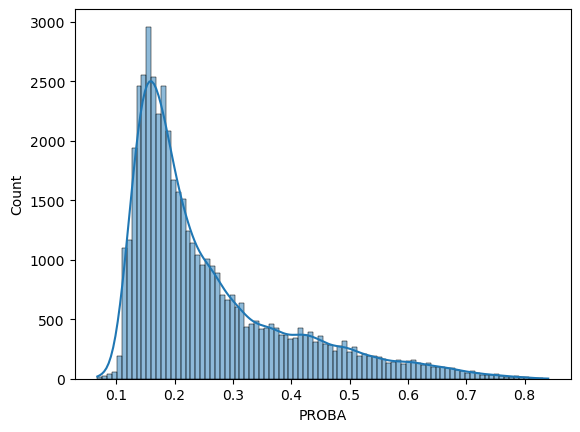

In [13]:
sns.histplot(data=test_info, x='PROBA', kde=True)

In [14]:
test_info.to_csv(r"C:\Users\Sofia\OneDrive\Documents\OpenClassrooms\Project_7\API\test_info.csv", index=False)